In [46]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import mstats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt

## Titanic EDA

I started off this task by creating a profiling report to help me with visualisations. I've left my python file within the folder that can be checked too.

#### 1. Understand the data
- Load in dataset and examine structure
- Check missing values and data types
- Get a feel for the data through basic visualisations and statistics

In [47]:
df = pd.read_csv("Titanic.csv")
df = df.set_index('PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


It seems that those who paid less for their ticket fare don't have a cabin number, based on the head and tail data.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [50]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

##### Checking for missing values

In [53]:
missing_values_count = df.isnull().sum()
missing_values_count

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Lots of missing values for cabin - seems that lower fare payers don't have a cabin.

Missing values for Age and 2 for Embarked.

In [54]:
df.duplicated().sum()

0

##### Plotting columns

Visualising how many males and females we have in the dataset.

Sex
male      577
female    314
Name: count, dtype: int64


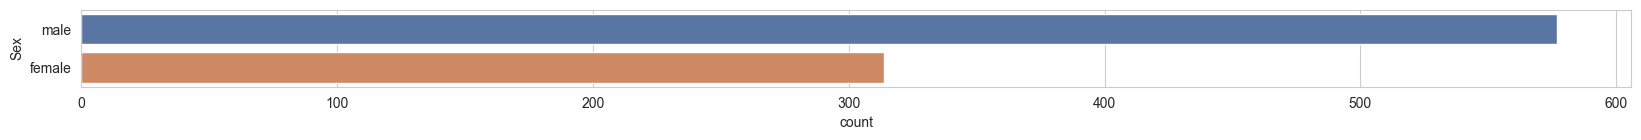

In [55]:
fig = plt.figure(figsize=(20,1))
sns.set_style("whitegrid")
sns.countplot(y="Sex", data=df, palette='deep')
print(df["Sex"].value_counts())
plt.show()

Visualising number of passengers in each class

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


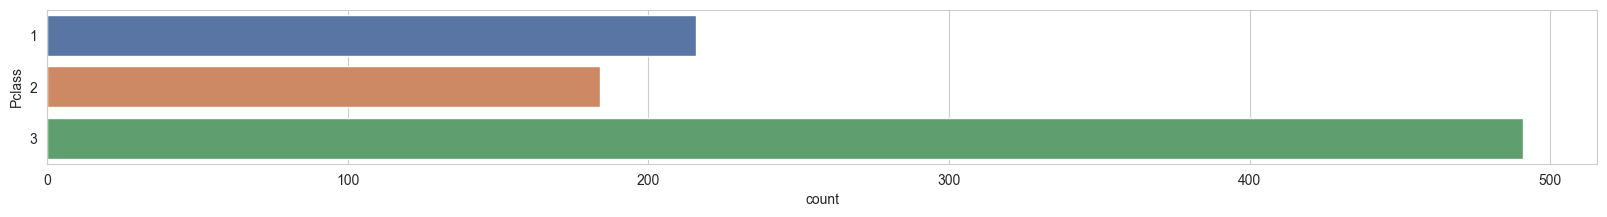

In [56]:
fig = plt.figure(figsize=(20,2))
sns.set_style("whitegrid")
sns.countplot(y="Pclass", data=df, palette='deep')
print(df["Pclass"].value_counts())

*Most passengers were of class 3.*

Visualising how many people died v survived

Survived
0    549
1    342
Name: count, dtype: int64


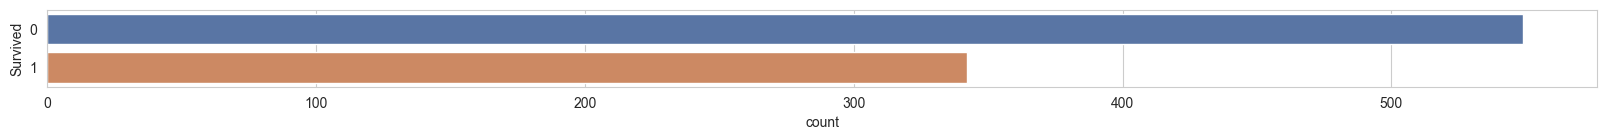

In [57]:
fig = plt.figure(figsize=(20,1))
sns.set_style("whitegrid")
sns.countplot(y="Survived", data=df, palette='deep')
print(df["Survived"].value_counts())

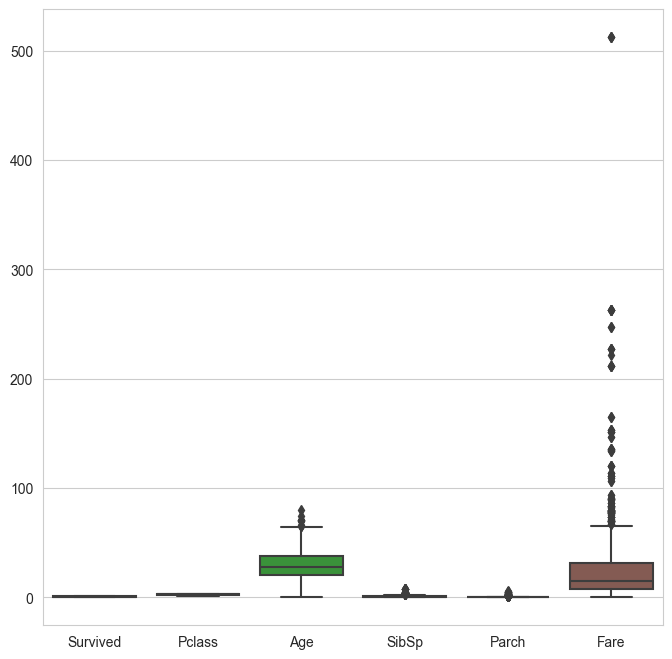

In [58]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(data=df)
plt.show()

#### 2. Clean and preprocess the data
- Handle missing values and outliers
- Encode categorical variables
- Scale or normalise numerical features

##### Handling missing data - imputation

In [59]:
# Renaming 'Pclass' to 'Class'
df = df.rename(columns={'Pclass' : 'Class'})

In [60]:
# Filling missing values in 'Age' column with mean

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'].isnull().sum()

0

In [61]:
# Filling missing values in 'Embarked' column with mode

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'].isnull().sum()

0

In [62]:
# Filling missing values in 'Cabin' column with 'None'

df['Cabin'] = df['Cabin'].fillna('None')
df['Cabin'].isnull().sum()

0

In [63]:
df['Cabin'].unique()

array(['None', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C6

In [64]:
df.head(10)

,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,None,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,None,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,None,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,None,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,None,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,None,S


##### Outliers

In [65]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features

Index(['Survived', 'Class', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

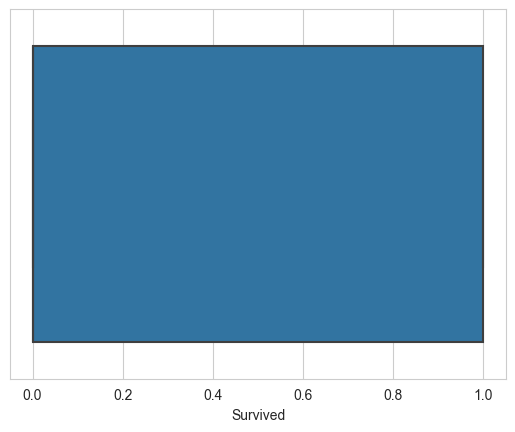

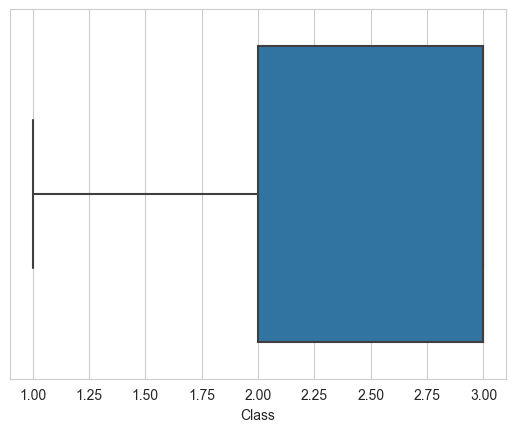

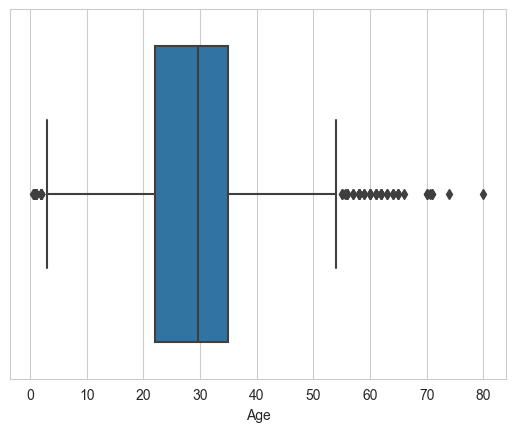

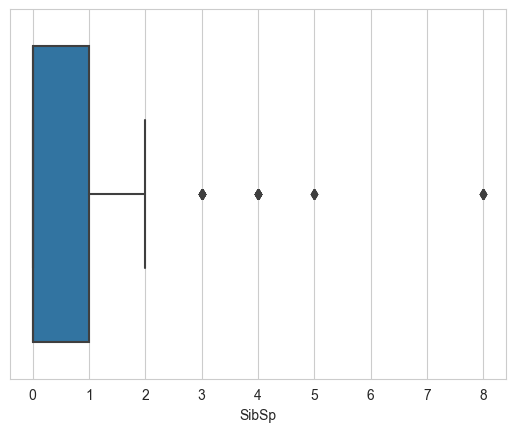

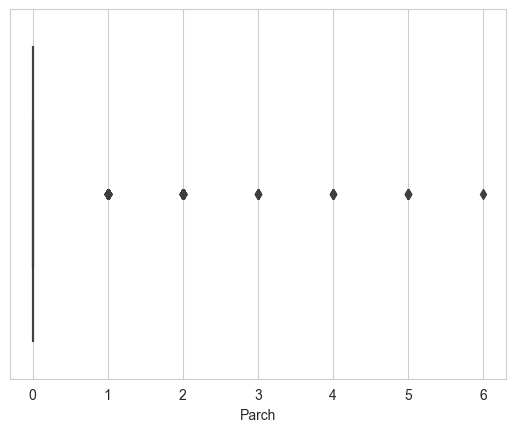

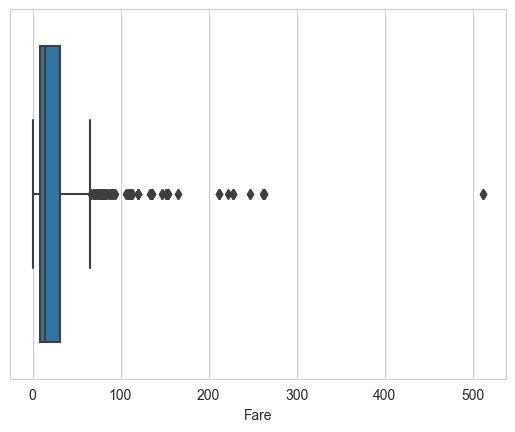

In [66]:
# Boxplots for numerical data in dataset to visualise outliers

for col in df.columns:
    if col in numerical_features:
        sns.boxplot(data=df, x=df[col])
        plt.show()

In [67]:
df['Fare'].quantile(0.01)

0.0

In [68]:
df['Fare'].quantile(0.98)

211.3375

In [69]:
# Winsorizing 'Fare' to limit impact of outliers
df['Fare']= mstats.winsorize(df['Fare'], limits=[0.10, 0.10])

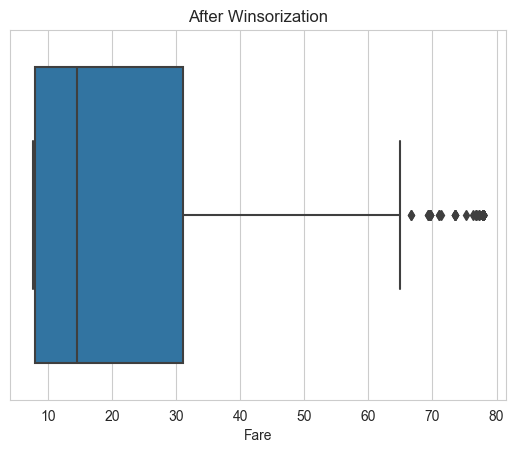

In [70]:
sns.boxplot(data=df, x='Fare')
plt.title("After Winsorization")
plt.show()

##### Encoding categorical variables

In [71]:
df.columns

Index(['Survived', 'Class', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [72]:
df.dtypes

Survived      int64
Class         int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [73]:
# Considered encoding 'Sex' and 'Embarked' columns for more meaningful analysis, but this seemed unnecessary

# from sklearn.preprocessing import OneHotEncoder

# nominal_features = ['Sex', 'Embarked']
# onehot_encoder = OneHotEncoder()
# df_onehot_encoded = onehot_encoder.fit_transform(df[nominal_features])
# df_onehot_encoded_df = pd.DataFrame(df_onehot_encoded.toarray(), columns=onehot_encoder.get_feature_names_out())

# # Drop original nominal columns
# df.drop(columns=nominal_features, axis=1, inplace=True)

# df = pd.concat([df, df_onehot_encoded_df], axis=1)

In [74]:
df.head()

,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.5500,None,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


It doesn't seem like the column 'Ticket' adds any valuable information to the data so I'll drop it.

In [75]:
df = df.drop('Ticket', axis=1)

In [76]:
df.head()

,Survived,Class,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.5500,None,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,None,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,None,S


In [77]:
df.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Only 38% of passengers survived the Titanic sinking. 62% did not survive.

#### 3. Explore relationships

Analyse relationships between features and target variable.
Identify patterns, trends and clusters

- Univariate analysis
- Bivariate analysis
- Multivariate analysis

c:\Users\amylo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\amylo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


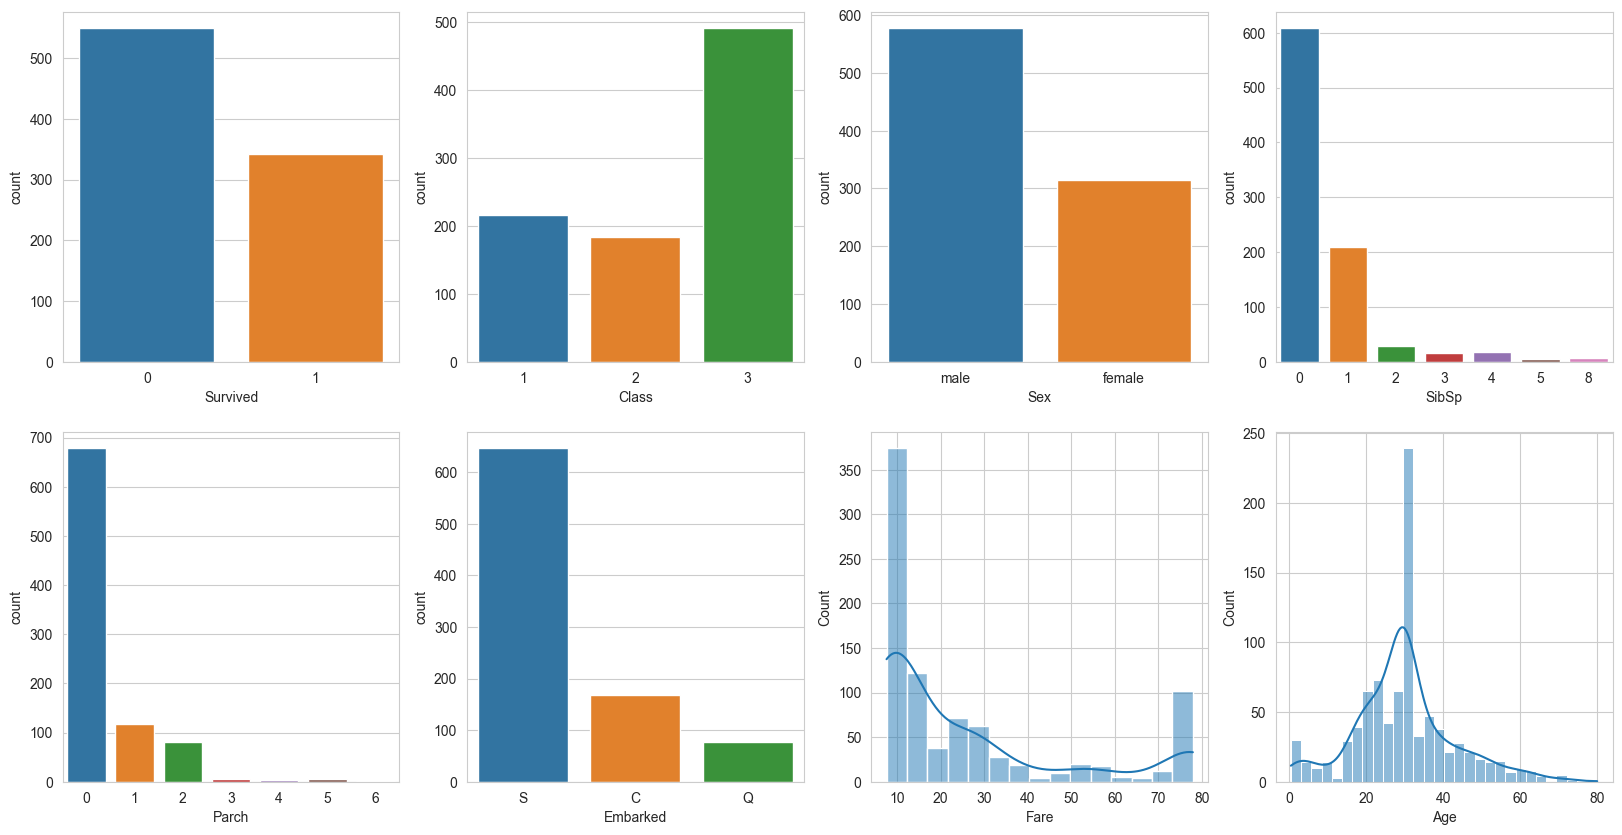

In [78]:
fig, axes = plt.subplots(2,4, figsize=(20, 10))
sns.countplot(x='Survived', data=df, ax=axes[0,0])
sns.countplot(x='Class', data=df, ax=axes[0,1])
sns.countplot(x='Sex', data=df, ax=axes[0,2])
sns.countplot(x='SibSp', data=df, ax=axes[0,3])
sns.countplot(x='Parch', data=df, ax=axes[1,0])
sns.countplot(x='Embarked',data=df, ax=axes[1,1])
sns.histplot(data=df, x='Fare', kde=True, ax=axes[1,2])
sns.histplot(data=df, x ='Age', kde=True, ax=axes[1,3])
plt.show()

In [79]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

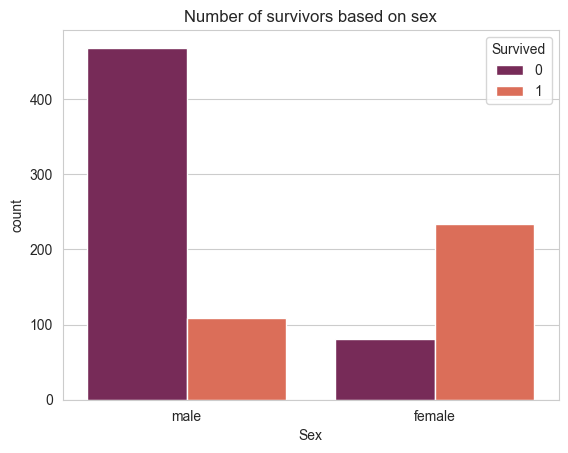

In [80]:
sns.countplot(x='Sex', hue='Survived', data=df, palette='rocket')
plt.title("Number of survivors based on sex")
plt.show()

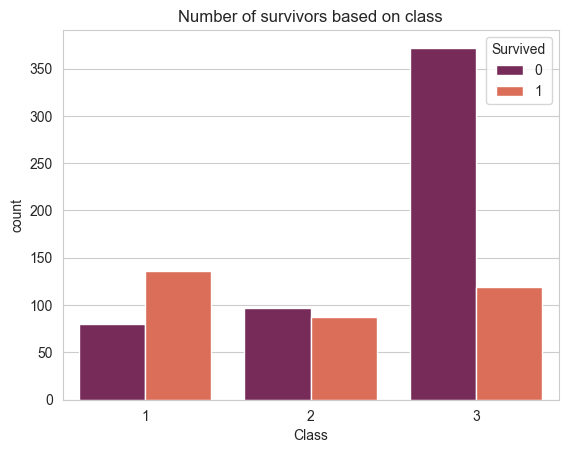

In [81]:
sns.countplot(x='Class', hue='Survived', data=df, palette='rocket')
plt.title("Number of survivors based on class")
plt.show()

c:\Users\amylo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\amylo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\amylo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\amylo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a leng

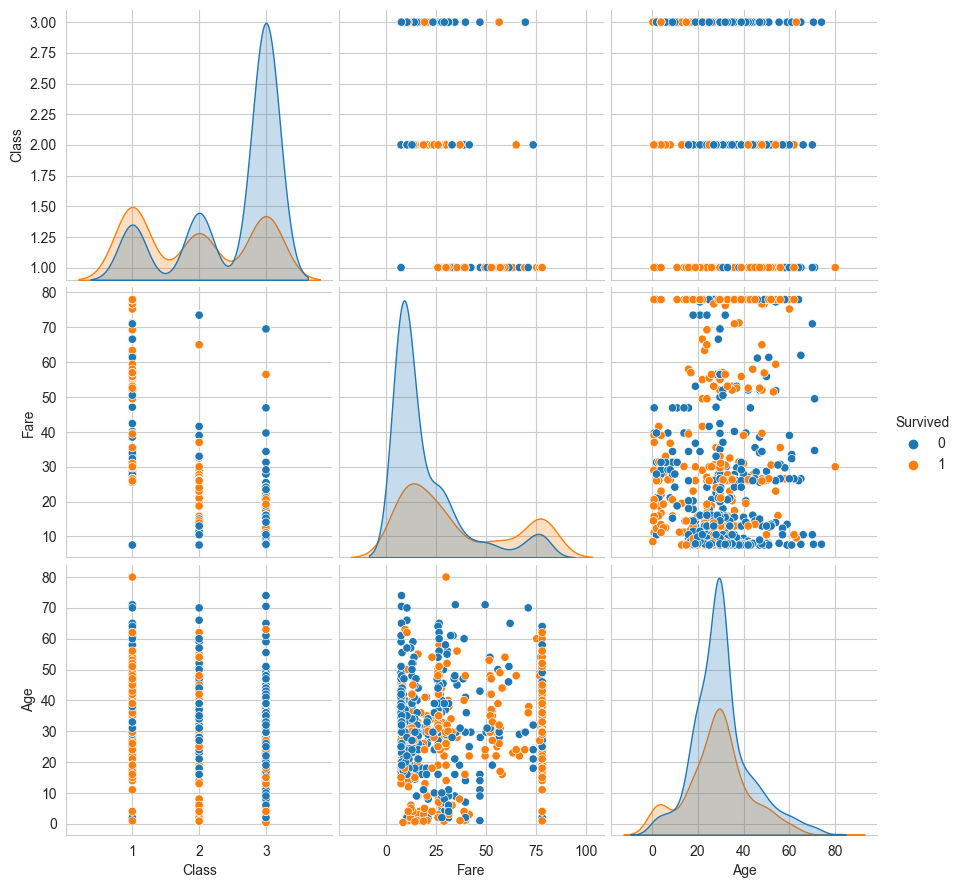

In [82]:
sns.set_style("whitegrid");
sns.pairplot(df[["Survived","Class","Fare","Age"]], hue="Survived", size=3);
plt.show()

In [83]:
pd.crosstab([df.Sex,df.Survived],df.Class,margins=True).style.background_gradient(cmap='coolwarm')

From this data we can see that more females survived than males. It also seems like passengers were more likely to survive if they were in a higher Class - this may be because they were in private cabins on the upper decks.

Females survived more in all Classes. 233 women survived in comparison to 109 men surviving.

In [84]:
pd.crosstab([df.Sex,df.Survived],df.Cabin,margins=True).style.background_gradient(cmap='coolwarm')

Those who had cabins were saved first and were more likely to be able to escape.

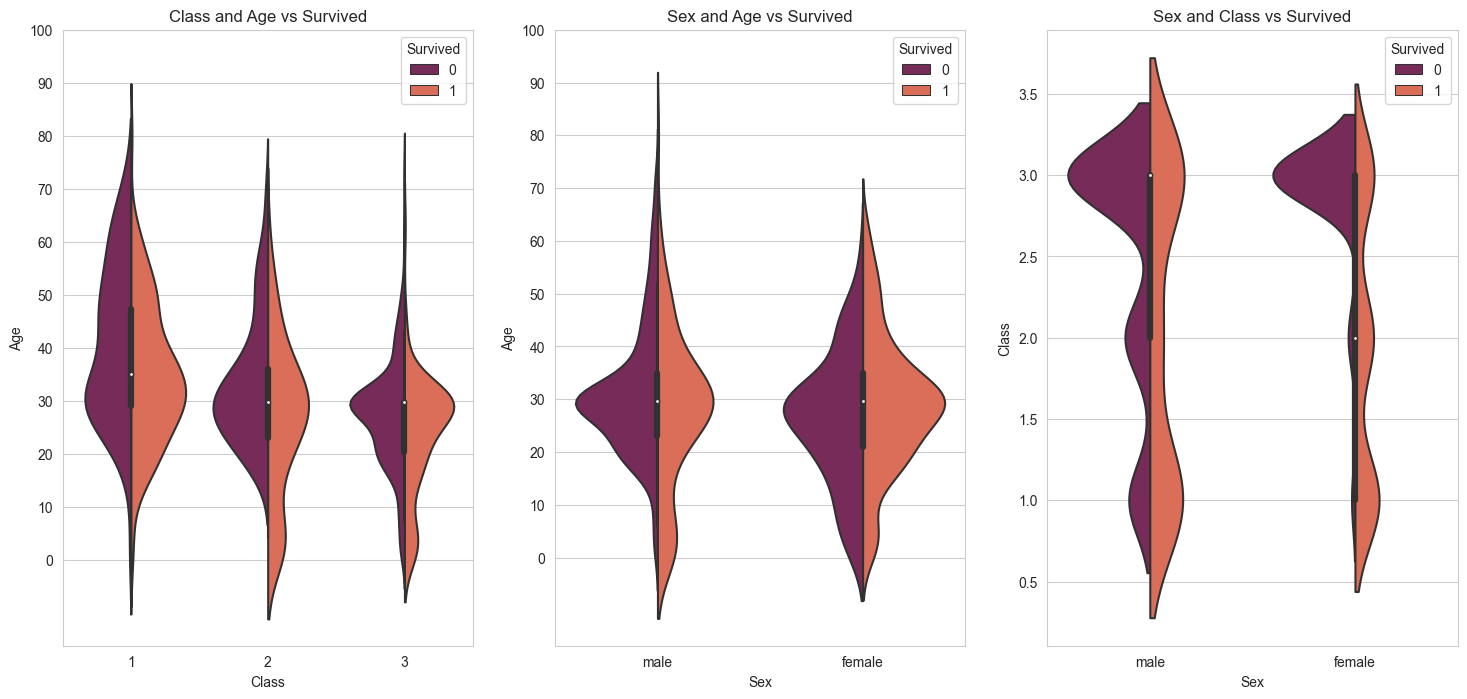

In [85]:
fig, ax = plt.subplots(1,3,figsize=(18,8))
sns.violinplot(data=df, x= 'Class', y= 'Age', hue='Survived', split=True, ax=ax[0], palette='rocket')
ax[0].set_title("Class and Age vs Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x= "Sex", y= "Age", hue="Survived", data=df, split=True, ax=ax[1], palette='rocket')
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
sns.violinplot(x='Sex', y='Class', hue='Survived', data=df, split=True, ax=ax[2], palette='rocket')
ax[2].set_title("Sex and Class vs Survived")
plt.show()

**Observations:**
- Children's survival is good irrespective of class.
- Women's survival rate is better than men's overall.
- People aged between 20-35 survived more.
- Most deaths were people over 30.
- Male children were more likely to be saved than female children.

## Task questions

### 1. What is the most important factor in determining survival of the Titanic incident?

*The factors that seemed to impact upon survival are: **Class, Age and Sex.***

*As can be seen from the visualisations above, the most important factor is Sex. Females survived a lot more than males, even males in Class 1. It's clear that women were given priority in the rescue/escape.*

### 2. In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?

In [86]:
pd.crosstab([df.Sex,df.Survived],df.Class,margins=True).style.background_gradient(cmap='coolwarm')

*From the above table it's clear that those from higher classes **were** given preference on lifeboats. Those in Classes 1 and 2 survived more than those in Class 3.*

***Most passengers travelling in Class 3 died.***

*In Class 3, 300 men died and 47 survived, whereas in Class 2, 91 men died and 17 survived. More men died in Class 1 than survived, but the number who survived was still relatively high.*

### 3. "Women and children first". Was this the case?

*From the above visualisations, this is clearly the case.*

*Priority was given to children, regardless of class, meaning that children survived at a higher rate than adults.*

*Women were also given priority for lifeboats as can be clearly seen in the data. Women consistently survived more than men, regardless of class. This can be clearly seen in the table above. Women survived in all classes more than they did not, in comparison to men who did survive more in higher classes, but still not as consistently as women.*

### 4. Other observations.

- *I noticed in the data that those who paid a higher fare, and were thus in a higher class, were assigned a cabin. Those who had a cabin assigned to them appear to have survived more than those who did not.*

- *I removed the 'Ticket' column from the dataset as it did not seem relevant to my analysis in reference to factors impacting surivival.*

- *From the violinplots above, it seems that there were a lot more younger women on board, as well as more older higher class men.*

- *Sibsp (number of siblings/spouses) seemed to have little impact upon survival.*